# 🔍 **Análise de vieses discriminatórios em Sistemas Judiciais Preditivos: Estudo de Caso do COMPAS**

Este projeto de análise tem como objetivo investigar as potenciais implicações éticas e a presença de vieses em sistemas judiciais preditivos, utilizando como estudo de caso o algoritmo COMPAS (Correctional Offender Management Profiling for Alternative Sanctions). O COMPAS é um sistema amplamente discutido e utilizado nos Estados Unidos para avaliar o risco de reincidência criminal.

Neste notebook, exploraremos um *dataset* publicamente disponível contendo informações relacionadas às avaliações do sistema COMPAS. Os conjuntos de dados estão disponíveis em:

https://www.kaggle.com/datasets/danofer/compass?resource=download

https://github.com/propublica/compas-analysis?tab=readme-ov-file


### 📦 Instalação de Bibliotecas

Esse comando instala bibliotecas essenciais para projetos de ciência de dados e aprendizado de máquina:

* pandas: manipulação e análise de dados em formato de tabelas (DataFrames).
* numpy: operações matemáticas e manipulação de arrays numéricos.
* matplotlib: criação de gráficos e visualizações básicas.
* seaborn: visualizações estatísticas com gráficos mais sofisticados.
* scikit-learn: ferramentas e algoritmos para machine learning, como classificação, regressão e agrupamento.

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

🐍 Mostrar a versão do Python instalada

In [ ]:
import sys

print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


Permite fazer upload de arquivos do seu computador para o ambiente de execução.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving compas-scores-raw.csv to compas-scores-raw.csv
Saving cox-violent-parsed.csv to cox-violent-parsed.csv
Saving cox-violent-parsed_filt.csv to cox-violent-parsed_filt.csv


O código lê três arquivos CSV em DataFrames do pandas e exibe as primeiras linhas de cada um para uma rápida inspeção dos dados.

In [ ]:
import pandas as pd

df1 = pd.read_csv('compas-scores-raw.csv')
df2 = pd.read_csv('cox-violent-parsed.csv')
df3 = pd.read_csv('cox-violent-parsed_filt.csv')

# Visualize as primeiras linhas para verificar
print("compas-scores-raw.csv:")
display(df1.head())
print("cox-violent-parsed:")
display(df2.head())
print("cox-violent-parsed_filt:")
display(df3.head())

compas-scores-raw.csv:


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


cox-violent-parsed:


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


cox-violent-parsed_filt:


,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['decile_score'].plot(kind='hist', bins=20, title='decile_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['juv_other_count'].plot(kind='hist', bins=20, title='juv_other_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('first').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('last').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('dob').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='decile_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='decile_score', y='juv_other_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='juv_other_count', y='priors_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('first')):
  _plot_series(series, series_name, i)
  fig.legend(title='first', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('last')):
  _plot_series(series, series_name, i)
  fig.legend(title='last', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dob')):
  _plot_series(series, series_name, i)
  fig.legend(title='dob', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_16['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['decile_score'].plot(kind='line', figsize=(8, 4), title='decile_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['juv_other_count'].plot(kind='line', figsize=(8, 4), title='juv_other_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['first'].value_counts()
    for x_label, grp in _df_20.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('first')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['last'].value_counts()
    for x_label, grp in _df_21.groupby('first')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('first')
_ = plt.ylabel('last')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dob'].value_counts()
    for x_label, grp in _df_22.groupby('last')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('last')
_ = plt.ylabel('dob')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['age_cat'].value_counts()
    for x_label, grp in _df_23.groupby('dob')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dob')
_ = plt.ylabel('age_cat')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='id', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['first'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='id', y='first', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['last'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='id', y='last', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['dob'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='id', y='dob', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

📈 Gráfico dos DataFrames

* Cria um gráfico de dispersão (`scatter`) do DataFrame `_df_8` mostrando a relação entre as colunas `id` e `age`.

* Remove as bordas superior e direita do gráfico para melhor visualização.

* Exibe informações resumidas sobre os três DataFrames, incluindo quantidade de linhas, colunas e tipos de dados.

In [ ]:
from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Exibe um resumo dos três DataFrames, mostrando o número de entradas, colunas, tipos de dados e memória usada.

In [ ]:
print("compas-scores-raw.csv Info:")
df1.info()
print("\ncox-violent-parsed.csv Info:")
df2.info()
print("\ncox-violent-parsed_filt.csv Info:")
df3.info()

compas-scores-raw.csv Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 

Verifica e exibe a quantidade de valores nulos em cada coluna dos três DataFrames.

In [ ]:
print("Valores nulos em compas-scores-raw.csv:")
print(df1.isnull().sum())
print("\nValores nulos em cox-violent-parsed.csv:")
print(df2.isnull().sum())
print("\nValores nulos em cox-violent-parsed_filt.csv:")
print(df3.isnull().sum())

Valores nulos em compas-scores-raw.csv:
Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45219
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

Valores nulos em cox-v

Lê os arquivos CSV e armazena seus conteúdos em DataFrames do pandas para posterior análise.


In [ ]:
# Carregar os dados (como mostrado anteriormente)
compas_df = pd.read_csv("compas-scores-raw.csv")
cox_df = pd.read_csv("cox-violent-parsed.csv")
cox_filt_df = pd.read_csv("cox-violent-parsed_filt.csv")

## 📊 Contagem de Frequência por Raça

Contar a frequência dos grupos raciais ajuda a entender a composição demográfica do conjunto de dados.

Conta quantas vezes cada grupo racial aparece na coluna race do DataFrame cox_df e imprime o resultado formatado em tabela Markdown.

In [ ]:
# Contando a frequência de diferentes grupos raciais
race_counts = cox_df['race'].value_counts()
print("\nContagem de Raças no Dataset cox_df:")
print(race_counts.to_markdown(numalign="left", stralign="left"))


Contagem de Raças no Dataset cox_df:
| race             | count   |
|:-----------------|:--------|
| African-American | 9791    |
| Caucasian        | 6086    |
| Hispanic         | 1451    |
| Other            | 860     |
| Asian            | 71      |
| Native American  | 57      |


## 📊 Visualização da Distribuição de Idades
Analisar a distribuição de idades permite entender a faixa etária predominante no conjunto de dados.

Importa as bibliotecas essenciais para análise e visualização de dados:

* pandas: manipulação de dados em tabelas.
* matplotlib.pyplot: criação de gráficos básicos.
* seaborn: gráficos estatísticos mais elaborados e estéticos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cria um histograma com a distribuição das idades no DataFrame cox_df, incluindo uma curva de densidade para facilitar a visualização da distribuição dos dados.

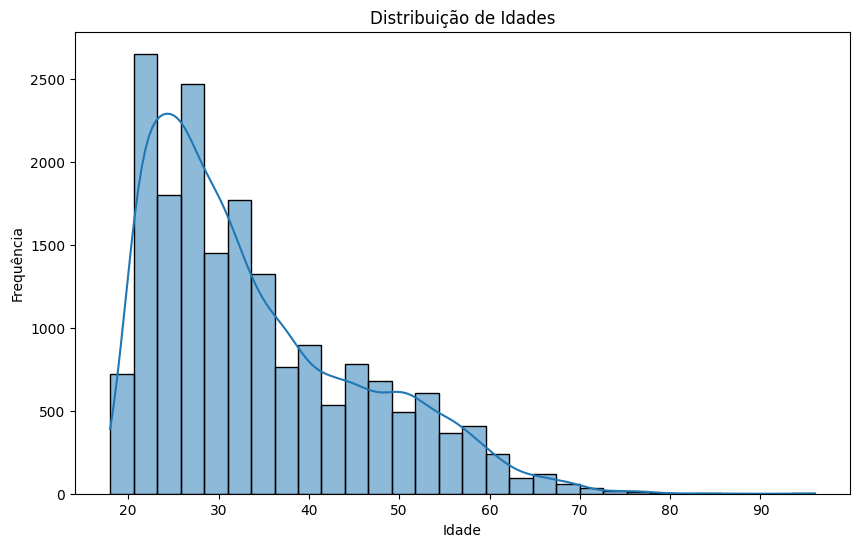

In [ ]:
# Visualizando a distribuição de idades
plt.figure(figsize=(10, 6))
sns.histplot(cox_df['age'], bins=30, kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Verifica a quantidade de dados ausentes (nulos) em cada coluna do DataFrame cox_df e exibe o resultado em formato de tabela Markdown.

In [ ]:
print("\nDados Ausentes no Dataset cox_df:")
print(cox_df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Dados Ausentes no Dataset cox_df:
|                         | 0     |
|:------------------------|:------|
| id                      | 7315  |
| name                    | 0     |
| first                   | 0     |
| last                    | 0     |
| compas_screening_date   | 0     |
| sex                     | 0     |
| dob                     | 0     |
| age                     | 0     |
| age_cat                 | 0     |
| race                    | 0     |
| juv_fel_count           | 0     |
| decile_score            | 0     |
| juv_misd_count          | 0     |
| juv_other_count         | 0     |
| priors_count            | 0     |
| days_b_screening_arrest | 1297  |
| c_jail_in               | 1297  |
| c_jail_out              | 1297  |
| c_case_number           | 867   |
| c_offense_date          | 3952  |
| c_arrest_date           | 15231 |
| c_days_from_compas      | 867   |
| c_charge_degree         | 867   |
| c_charge_desc           | 881   |
| is_recid                | 0

Calcula a média das pontuações de risco (decile_score) para cada grupo racial no DataFrame `cox_df` e imprime o resultado formatado em tabela Markdown.

In [ ]:
# Comparando pontuações de risco entre raças (Exemplo simplificado)
mean_scores_by_race = cox_df.groupby('race')['decile_score'].mean()
print("\nMédia das Pontuações de Risco por Raça (cox_df):")
print(mean_scores_by_race.to_markdown(numalign="left", stralign="left"))


Média das Pontuações de Risco por Raça (cox_df):
| race             | decile_score   |
|:-----------------|:---------------|
| African-American | 5.86488        |
| Asian            | 3.21127        |
| Caucasian        | 4.17926        |
| Hispanic         | 3.74225        |
| Native American  | 5.36842        |
| Other            | 3.14419        |


Cria um gráfico de barras que mostra a média das pontuações de risco para cada grupo racial, facilitando a comparação visual entre eles.

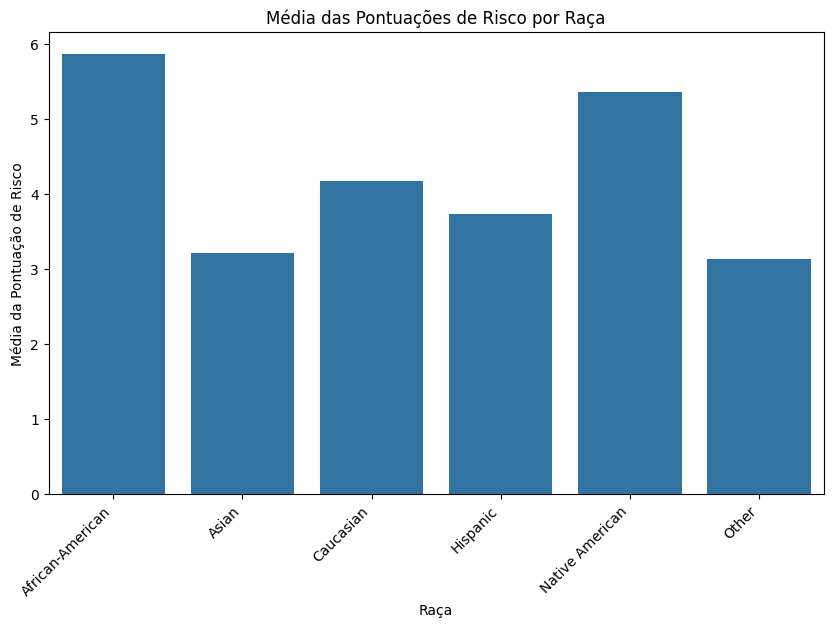

In [ ]:
# Visualizando as médias das pontuações de risco por raça
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores_by_race.index, y=mean_scores_by_race.values)
plt.title('Média das Pontuações de Risco por Raça')
plt.xlabel('Raça')
plt.ylabel('Média da Pontuação de Risco')
plt.xticks(rotation=45, ha='right')
plt.show()

## 📦 Carregamento e Visualização da Distribuição das Pontuações de Risco por Raça

Este trecho carrega os dados e mostra como as pontuações de risco variam entre diferentes grupos raciais.

Importa novamente as bibliotecas para análise e visualização de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Carrega os dados do arquivo CSV e cria um gráfico de caixa (boxplot) para mostrar a distribuição das pontuações de risco (decile_score) para cada grupo racial.

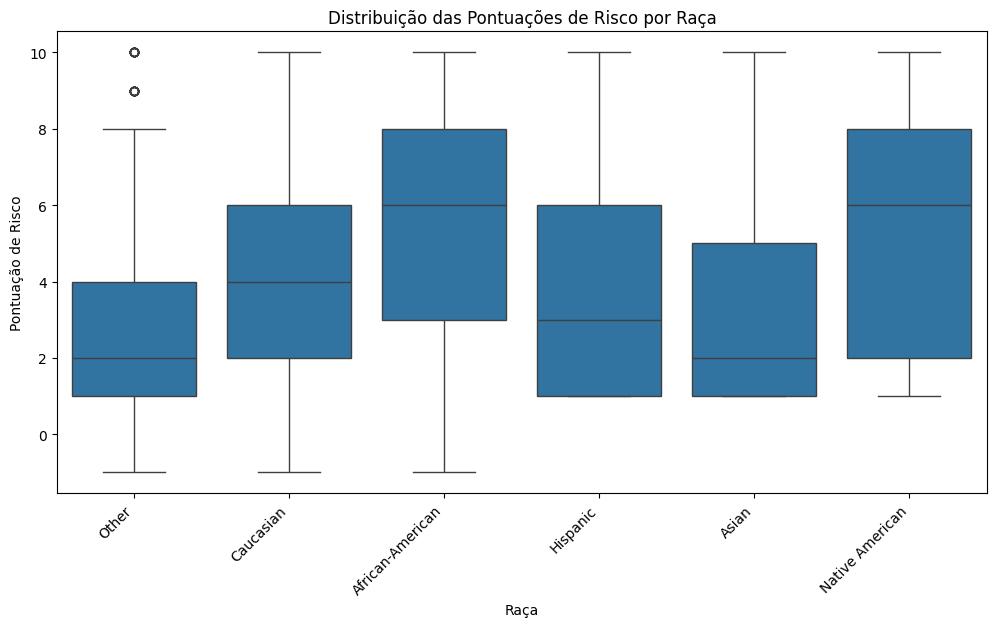

In [ ]:
# Carregando os dados (usando cox_df como exemplo)
cox_df = pd.read_csv("cox-violent-parsed.csv")

# Distribuição das pontuações de risco por raça
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='decile_score', data=cox_df)
plt.title('Distribuição das Pontuações de Risco por Raça')
plt.xlabel('Raça')
plt.ylabel('Pontuação de Risco')
plt.xticks(rotation=45, ha='right')
plt.show()

### Teste ANOVA para Comparar Médias entre Grupos Raciais

Realiza um teste ANOVA para verificar se há diferença estatisticamente significativa nas médias das pontuações de risco (decile_score) entre os diferentes grupos raciais.

In [ ]:
# Exemplo: ANOVA (já que temos mais de dois grupos)
groups = cox_df['race'].unique()
scores_by_group = [cox_df[cox_df['race'] == g]['decile_score'] for g in groups]
anova_result = stats.f_oneway(*scores_by_group)
print("\nResultado da ANOVA:")
print(anova_result)


Resultado da ANOVA:
F_onewayResult(statistic=np.float64(438.9136578339304), pvalue=np.float64(0.0))


### Teste Post-Hoc Tukey HSD para Comparações Entre Grupos

 Realiza o teste post-hoc de Tukey HSD para identificar quais pares de grupos raciais apresentam diferenças significativas nas médias das pontuações de risco, após a ANOVA.

In [ ]:
# Comparando post-hoc (após a ANOVA), usando o Tukey HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(cox_df['decile_score'], cox_df['race'], alpha=0.05)
print("\nResultado do Teste de Tukey HSD:")
print(tukey_result)


Resultado do Teste de Tukey HSD:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2     meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
African-American           Asian  -2.6536    0.0  -3.596 -1.7112   True
African-American       Caucasian  -1.6856    0.0 -1.8148 -1.5565   True
African-American        Hispanic  -2.1226    0.0 -2.3452    -1.9   True
African-American Native American  -0.4965 0.7591 -1.5475  0.5546  False
African-American           Other  -2.7207    0.0 -3.0021 -2.4393   True
           Asian       Caucasian    0.968 0.0408  0.0235  1.9125   True
           Asian        Hispanic    0.531 0.6162 -0.4308  1.4927  False
           Asian Native American   2.1572 0.0002    0.75  3.5643   True
           Asian           Other  -0.0671    1.0 -1.0441    0.91  False
       Caucasian        Hispanic   -0.437    0.0 -0.6682 -0.2059   True
       Caucasian Native Americ